In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# importing the file and checking the main features

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Renaming the columns and normalizing the format

In [6]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

In [7]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [8]:
# Creating function to seperate the data into continuous and discrete portions

In [9]:
def function(x):
    conti=[]
    disc=[]
    for i in x.columns:
        if x[i].nunique()>=10:
            conti.append(i)
        else:
            disc.append(i)
    return conti,disc

conti,disc=function(customer_df)

In [10]:
conti

['customer',
 'customer_lifetime_value',
 'effective_to_date',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

In [11]:
continuous_df=customer_df[conti]
discrete_df=customer_df[disc]

In [12]:
continuous_df.head()

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879


# Correlation matrix

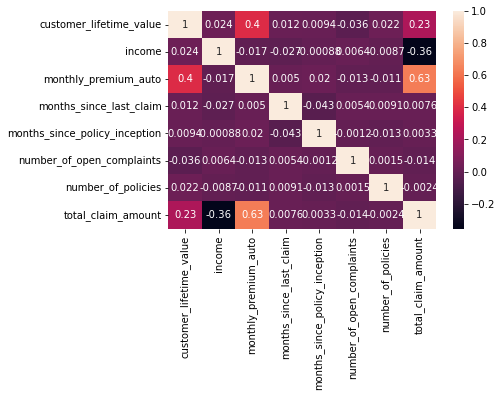

In [13]:
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
# The correlation between total_claim_amount and monthly_premium_auto is 0.63 and this is the highest correlation in this matrix.
# In this case we don't need to consider to drop any columns.

# Creating function to every variable

In [15]:
def plot_discrete(x):
    for i in x.columns:
        x[i].hist()
        plt.show()
    return


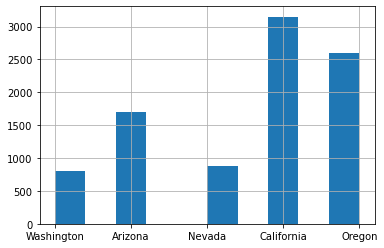

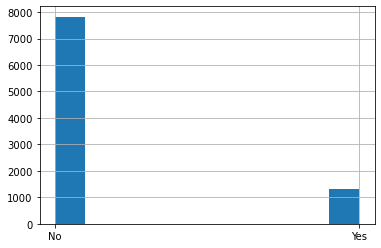

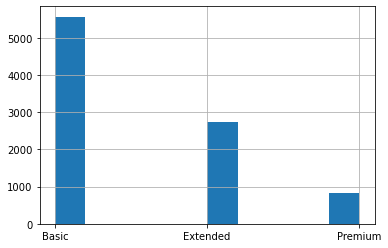

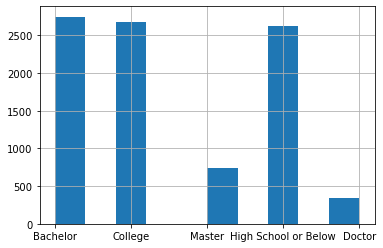

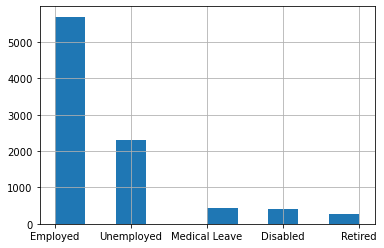

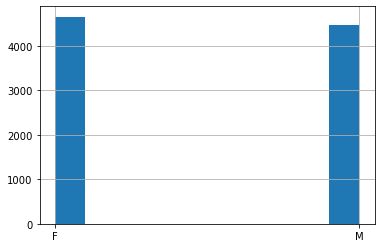

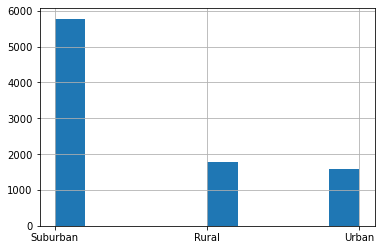

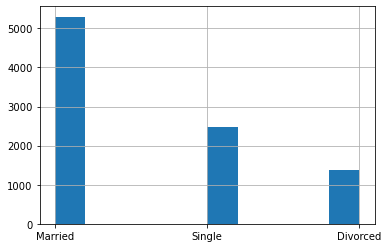

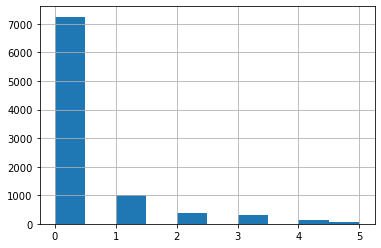

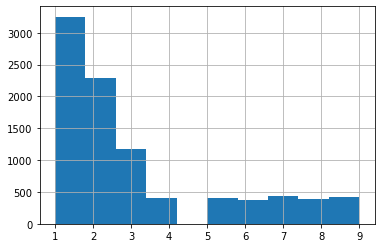

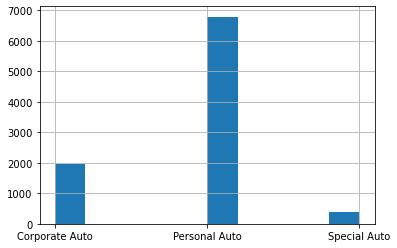

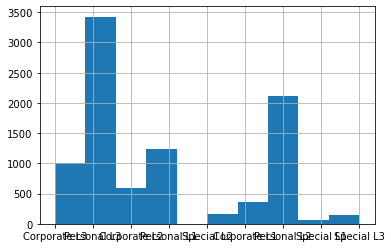

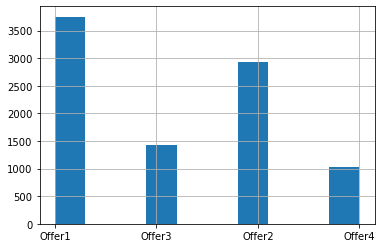

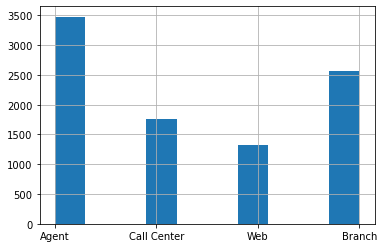

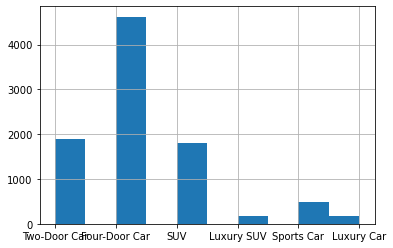

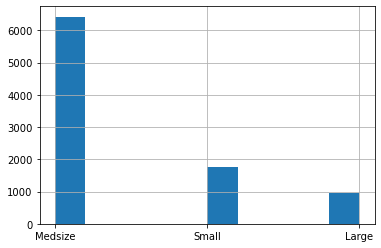

In [16]:
plot_discrete(discrete_df)

In [17]:
def plot_conti(x):
    for i in x.drop(['customer','effective_to_date'],axis=1).columns:
        sns.distplot(x[i])
        plt.show()
    return

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


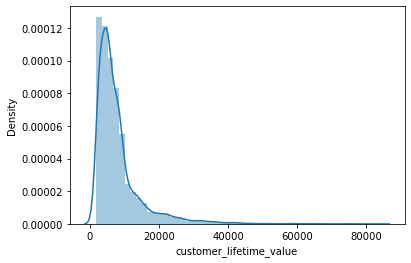

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


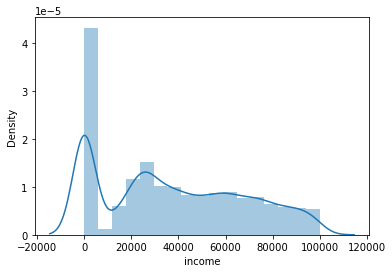

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


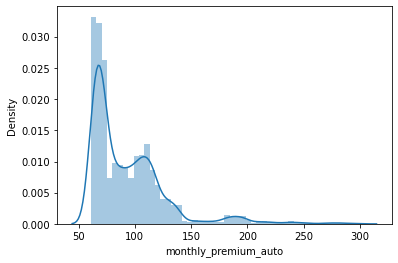

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


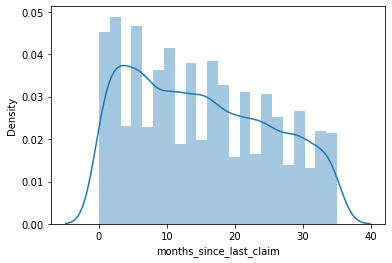

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


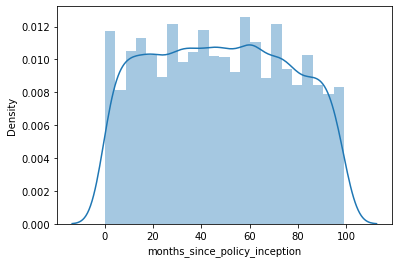

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


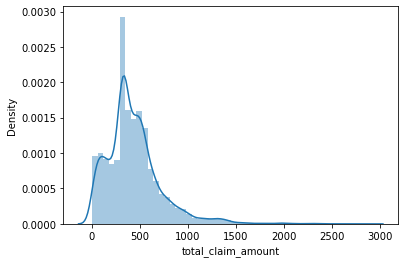

In [18]:
plot_conti(continuous_df)

# Creating plots to look for outliers

In [19]:
def plot_outliers(x):
    for i in x.drop(['customer','effective_to_date'],axis=1).columns:
        sns.boxplot(y=x[i])
        plt.show()
    return

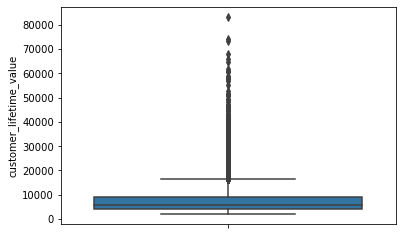

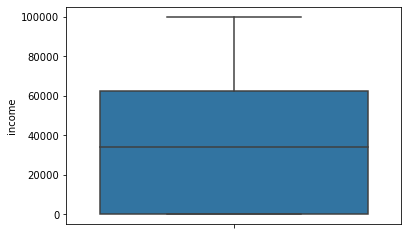

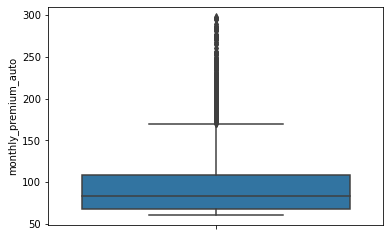

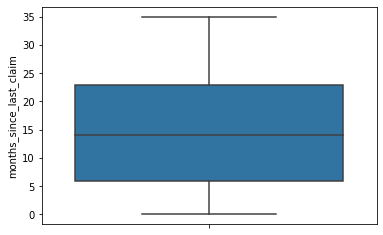

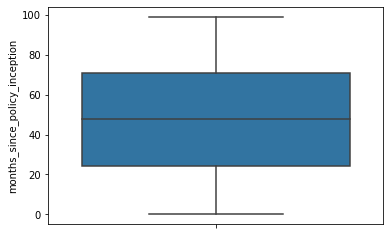

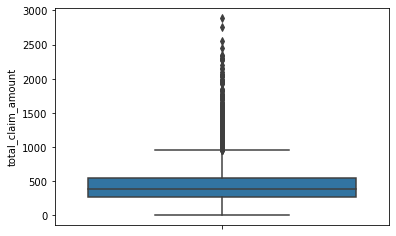

In [20]:
plot_outliers(continuous_df)

# Checking for NaN values

In [21]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Selecting the categorical data

In [22]:
categorical_df=customer_df.select_dtypes(object)

In [23]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [25]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [26]:
for name in categorical_df.columns:
    display(categorical_df[name].unique())

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Basic', 'Extended', 'Premium'], dtype=object)

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

array(['F', 'M'], dtype=object)

array(['Suburban', 'Rural', 'Urban'], dtype=object)

array(['Married', 'Single', 'Divorced'], dtype=object)

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

array(['Medsize', 'Small', 'Large'], dtype=object)

In [27]:
# The values in customer, policy and renew_offer_type columns contain alpha and numeric data. In my opinion we can directly drop the customer column and keep the other two columns.

In [28]:
# Comparing witb policy_type and policy i think the most important thing is policy_type. 
# The policy_type contain three different classes Corporate, Personal and Special. In policy column it has subclasses under these three classes L1,L2,L3
# When the policy_type is Corporate then the policy should be corporate but which subclasses it belongs to depends on the case. 
# In my opinion we can transfer the policy column to numerical column. 

In [29]:
for name in categorical_df.columns:
    display(categorical_df[name].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [30]:
# There are a few ways to make the columns simpler.
# First of all we can drop the customer column.
categorical_df=categorical_df.drop('customer',axis=1)

In [31]:
#Secondly we can combine some of the classes together. For example in employment_status we can merge Medical leave, disabled and retired into one class and name it 'other'
categorical_df['employmentstatus']=np.where(categorical_df['employmentstatus'].isin(['Employed','Unemployed']),categorical_df['employmentstatus'],'other')

In [32]:
# We can transfer the policy to numerical column.
#categorical_df['policy']=categorical_df['policy'].str.split('L',expand=True)[1]

In [33]:
#categorical_df['policy'].value_counts()

# Lab Feature extraction

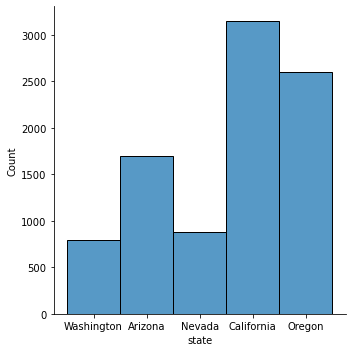

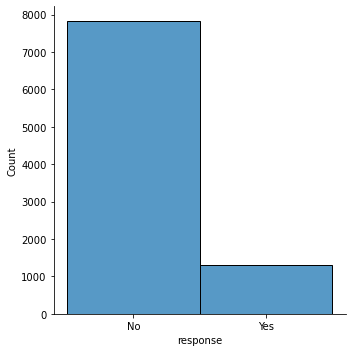

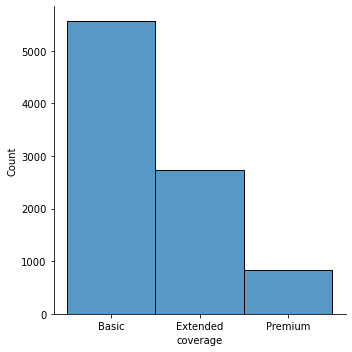

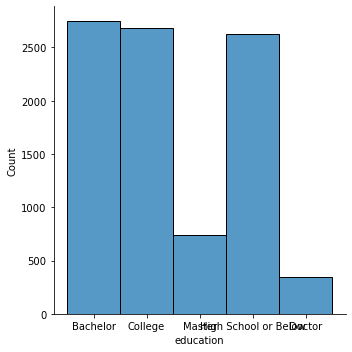

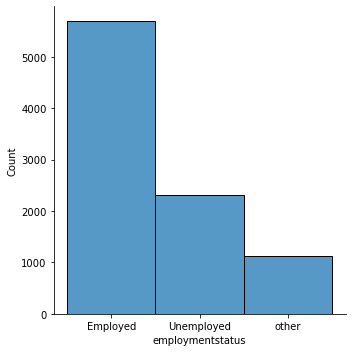

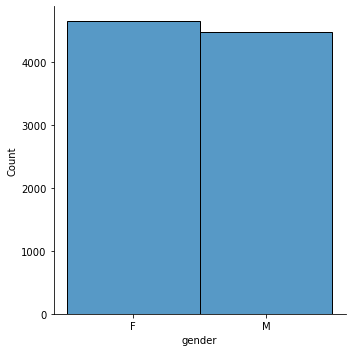

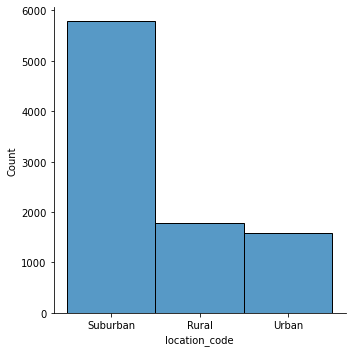

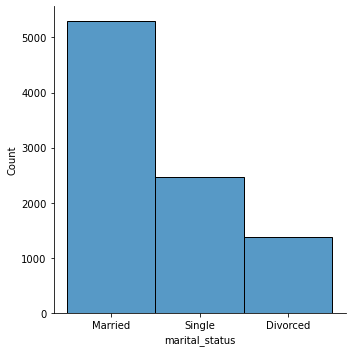

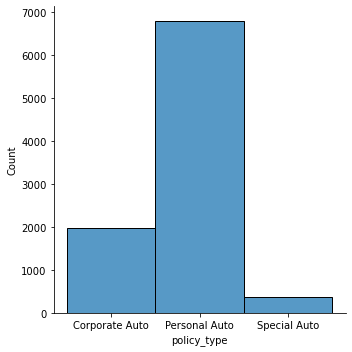

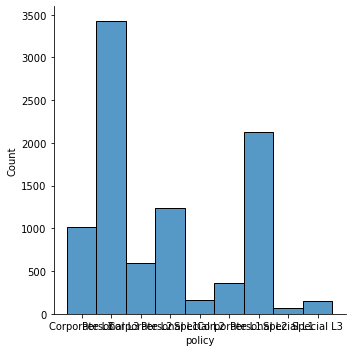

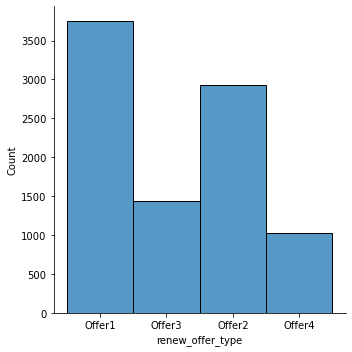

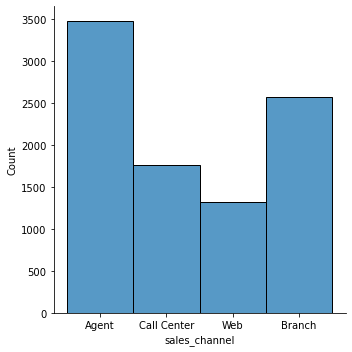

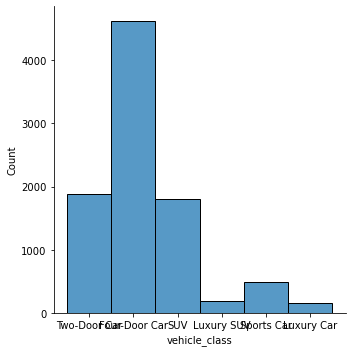

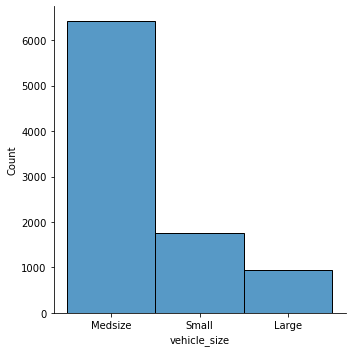

In [35]:
for name in categorical_df.columns:
    sns.displot(data=categorical_df[name])
    plt.show()

In [ ]:
# The policy and policy_type column seem to be redundant. I select to transfer the policy column to numerical.

5106

In [57]:
time_df=customer_df[['customer','effective_to_date']]

In [59]:
time_df.head()

,customer,effective_to_date
0,BU79786,2011-02-24
1,QZ44356,2011-01-31
2,AI49188,2011-02-19
3,WW63253,2011-01-20
4,HB64268,2011-02-03


In [60]:
time_df.nunique()

customer             9134
effective_to_date      59
dtype: int64

In [65]:
time_df=time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}).rename(columns={'customer':'number'})

<AxesSubplot:xlabel='effective_to_date', ylabel='number'>

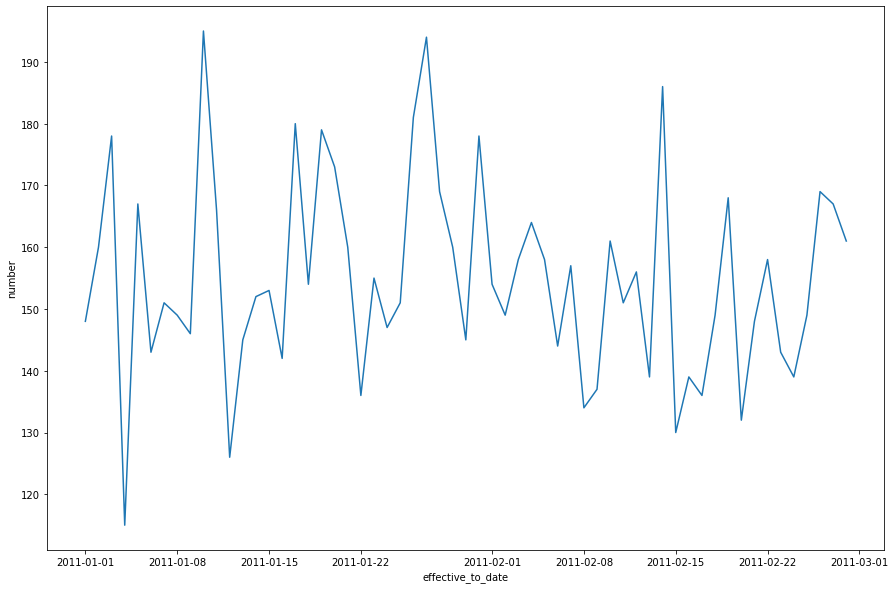

In [67]:
plt.figure(figsize=(15,10))

sns.lineplot(data=time_df,x='effective_to_date',y='number')